In [1]:
import sys
import os
from typing import Tuple

sys.path.append('/home/danillorp/Área de Trabalho/github/fema/src/')


import fema_classifier
import fema_feature_learning
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
from keras.datasets import mnist

2024-03-07 09:31:54.981468: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-07 09:31:55.032137: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 09:31:55.032171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 09:31:55.033786: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 09:31:55.042924: I tensorflow/core/platform/cpu_feature_guar

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [4]:
print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers = {'DecisionTreeClassifier()':DecisionTreeClassifier(),
               'RandomForestClassifier()':RandomForestClassifier()}


In [6]:
train_x_ravel = train_x.reshape(train_x.shape[0],train_x.shape[1]*train_x.shape[2])
test_x_ravel = test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2])

In [7]:
for c in classifiers:
    classifiers[c].fit(train_x_ravel,train_y)
    pred = classifiers[c].predict(test_x_ravel)

    cm = confusion_matrix(test_y,pred)
    bal = balanced_accuracy_score(test_y, pred)
    acc = accuracy_score(test_y, pred)

    print('*****',c,'*******')
    print('CM ',c,'Original:',cm)
    print('BalAcc ',c,' Original:',bal)
    print('Acc ',c,'Original:',acc)
    print('************')

***** DecisionTreeClassifier() *******
CM  DecisionTreeClassifier() Original: [[ 911    1    8    5    7   10   13    4   11   10]
 [   2 1088   11    8    3    4    7    3    7    2]
 [  14    9  871   37   16   12   12   25   29    7]
 [   9    5   30  859    5   49    3    7   26   17]
 [   7    3    8    5  863   15   15    9   19   38]
 [  16    7    5   42    7  746   26    5   21   17]
 [  16    3   14   12   21   21  844    2   22    3]
 [   3   13   28   18    7    9    0  920    6   24]
 [   9    9   28   38   18   26   18   10  786   32]
 [  15    6    7   25   38   13    6   21   23  855]]
BalAcc  DecisionTreeClassifier()  Original: 0.8728109928593459
Acc  DecisionTreeClassifier() Original: 0.8743
************
***** RandomForestClassifier() *******
CM  RandomForestClassifier() Original: [[ 970    0    1    0    0    2    3    1    3    0]
 [   0 1125    1    3    0    2    2    1    1    0]
 [   5    0 1000    5    3    0    3    9    7    0]
 [   1    0   10  977    0    4

In [21]:
model_fl = fema_feature_learning.FEMaFeatureLearning(k=10,basis=fema_classifier.Basis.radialBasis)

print(train_x.shape, train_x_ravel.shape, train_y.shape)
_x, eval_x, _y, eval_y = train_test_split(train_x_ravel, train_y, test_size=0.05)
print(eval_x.shape, eval_y.shape)

features_weigths = model_fl.fit(eval_x, eval_y.reshape(eval_y.shape[0],1), np.array([0]), np.array([0]))



(60000, 28, 28) (60000, 784) (60000,)
(3000, 784) (3000,)
Running:  0.0  concluded.
Running:  0.1  concluded.
Running:  0.2  concluded.
Running:  0.3  concluded.
Running:  0.4  concluded.
Running:  0.5  concluded.
Running:  0.6  concluded.
Running:  0.7  concluded.
Running:  0.8  concluded.
Running:  0.9  concluded.


In [27]:
model_fl.features_weigth.reshape(2,10,28,28).shape

(2, 10, 28, 28)

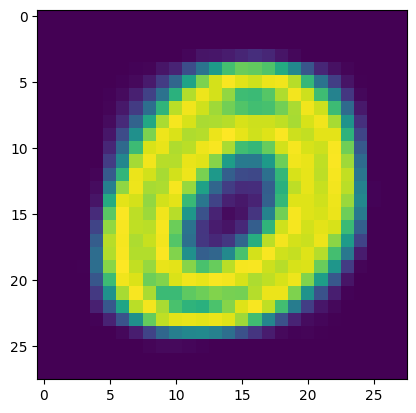

In [29]:
plt.imshow(model_fl.features_weigth[model_fl.INTRA,0].reshape(28,28))

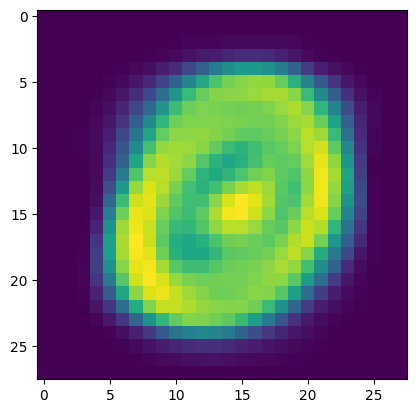

In [30]:
plt.imshow(model_fl.features_weigth[model_fl.INTER,0].reshape(28,28))

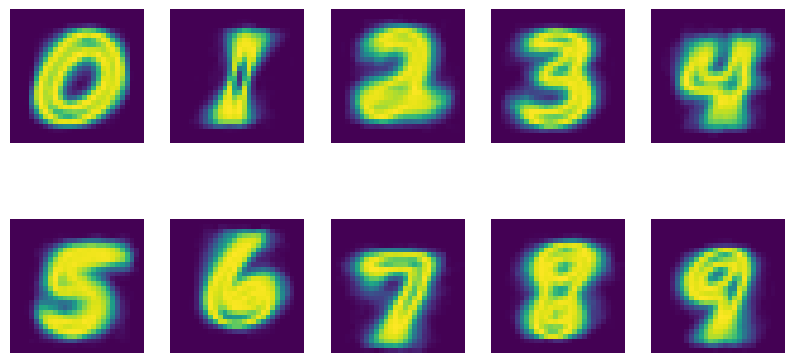

In [38]:
fig = plt.figure(figsize=(10, 5)) 
  
# setting values to rows and column variables 
rows = 2
columns = 5
    
count = 1
for r in range(rows):
    for c in range(columns):
        
        # Adds a subplot at the 1st position 
        fig.add_subplot(rows, columns, count) 
      
        # showing image         
        plt.imshow(model_fl.features_weigth[model_fl.INTRA,count-1].reshape(28,28)) 
        plt.axis('off') 

        count = count+1


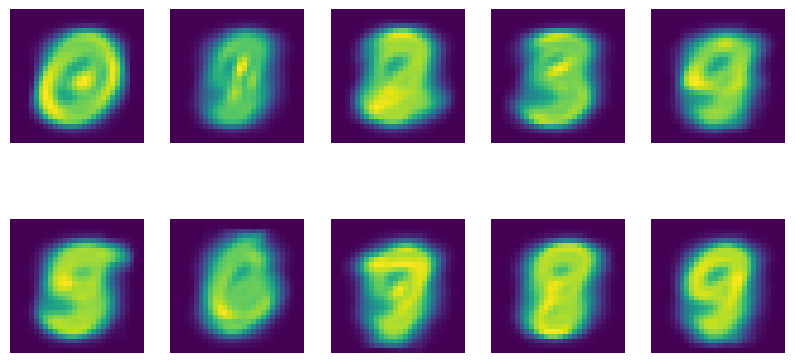

In [39]:
fig = plt.figure(figsize=(10, 5)) 
  
# setting values to rows and column variables 
rows = 2
columns = 5
    
count = 1
for r in range(rows):
    for c in range(columns):
        
        # Adds a subplot at the 1st position 
        fig.add_subplot(rows, columns, count) 
      
        # showing image         
        plt.imshow(model_fl.features_weigth[model_fl.INTER,count-1].reshape(28,28)) 
        plt.axis('off') 

        count = count+1


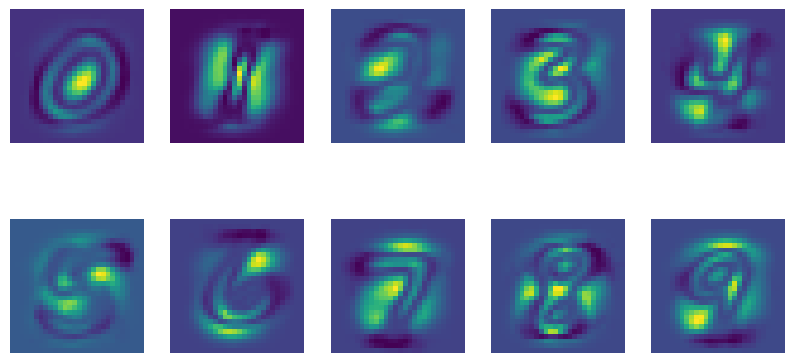

In [46]:
fig = plt.figure(figsize=(10, 5)) 
  
# setting values to rows and column variables 
rows = 2
columns = 5
    
count = 1
for r in range(rows):
    for c in range(columns):
        
        # Adds a subplot at the 1st position 
        fig.add_subplot(rows, columns, count) 
      
        # showing image         
        plt.imshow(model_fl.features_weigth[model_fl.INTER,count-1].reshape(28,28)-(model_fl.features_weigth[model_fl.INTRA,count-1].reshape(28,28))) 
        plt.axis('off') 

        count = count+1


In [88]:
fl_weigths = np.zeros((model_fl.features_weigth.shape[2]))
n_classes = len(set(train_y))

for c in range(n_classes):
    for f in range(train_x_ravel.shape[1]):
        fl_weigths[f] = fl_weigths[f] + (features_weigths[model_fl.INTER, c, f]+features_weigths[model_fl.INTRA, c, f])/n_classes

max_w = np.max(fl_weigths)
for f in range(train_x_ravel.shape[1]):
    fl_weigths[f] = fl_weigths[f]/max_w

In [89]:
fl_weigths

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.92188235e-04, 1.46498381e-03,
       1.31443211e-03, 6.52525913e-04, 3.97086170e-03, 3.99327730e-03,
       2.47825437e-03, 2.59656536e-03, 3.93133604e-03, 3.34180040e-03,
       2.16696164e-03, 0.00000000e+00, 7.86916315e-04, 3.58598721e-03,
       3.18759573e-03, 2.54699122e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

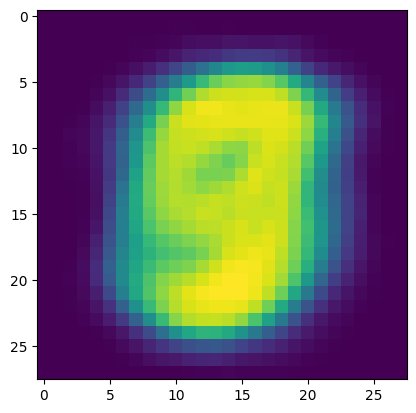

In [90]:
plt.imshow(fl_weigths.reshape(28,28))

In [59]:
train_x_cp = train_x_ravel.copy()
test_x_cp  = test_x_ravel.copy()

for c in range(len(set(train_y))):

    for f in range(train_x_cp.shape[1]):
        mask_inter = train_y != c
        mask_intra = train_y == c
        
        train_x_cp[:,f] =   (train_x_cp[:,f])*  (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])
        test_x_cp[:,f] =    (test_x_cp[:,f]) * (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])


/tmp/ipykernel_180500/157218497.py:10: RuntimeWarning: invalid value encountered in scalar divide
  train_x_cp[:,f] =   (train_x_cp[:,f])*  (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])
/tmp/ipykernel_180500/157218497.py:10: RuntimeWarning: invalid value encountered in cast
  train_x_cp[:,f] =   (train_x_cp[:,f])*  (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])
/tmp/ipykernel_180500/157218497.py:11: RuntimeWarning: invalid value encountered in scalar divide
  test_x_cp[:,f] =    (test_x_cp[:,f]) * (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])
/tmp/ipykernel_180500/157218497.py:11: RuntimeWarning: invalid value encountered in cast
  test_x_cp[:,f] =    (test_x_cp[:,f]) * (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])
/tmp/ipykernel_180500/157218497.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  train_x_cp[:,f] =   (train_x_cp[:,f])* 

In [60]:
for c in classifiers:
    classifiers[c].fit(train_x_cp,train_y)
    pred = classifiers[c].predict(test_x_cp)

    cm = confusion_matrix(test_y,pred)
    bal = balanced_accuracy_score(test_y, pred)
    acc = accuracy_score(test_y, pred)

    print('*****',c,'*******')
    print('CM ',c,'Original:',cm)
    print('BalAcc ',c,' Original:',bal)
    print('Acc ',c,'Original:',acc)
    print('************')

***** DecisionTreeClassifier() *******
CM  DecisionTreeClassifier() Original: [[ 903    1   14    7    6   13   13    4   13    6]
 [   0 1076    5    5    6    9    8    9   14    3]
 [  19   16  858   44   13    9   17   27   22    7]
 [  12    9   34  797   10   56    8   15   43   26]
 [   3    3   13    5  853   13    8   12   24   48]
 [  15    7    7   68   15  681   33    9   35   22]
 [   9    4   17    6   34   36  823    4   18    7]
 [   3   21   32   23   18    8    1  886    8   28]
 [   9   15   43   54   27   33   23   12  716   42]
 [   9    5   11   28   58   14    3   33   19  829]]
BalAcc  DecisionTreeClassifier()  Original: 0.839970641528122
Acc  DecisionTreeClassifier() Original: 0.8422
************
***** RandomForestClassifier() *******
CM  RandomForestClassifier() Original: [[ 970    0    0    0    0    3    3    1    3    0]
 [   0 1116    4    2    0    1    3    0    8    1]
 [   7    1  983    7    5    1    7   12    8    1]
 [   1    0   17  947    1   15 

In [78]:
train_x_cp = train_x_ravel.copy()
test_x_cp  = test_x_ravel.copy()

for f in range(train_x_cp.shape[1]):
    mask_inter = train_y != c
    mask_intra = train_y == c
    
    train_x_cp[:,f] =   (train_x_cp[:,f]) *  (fl_weigths[f])
    test_x_cp[:,f] =    (test_x_cp[:,f])  *  (fl_weigths[f])


In [79]:
for c in classifiers:
    classifiers[c].fit(train_x_cp,train_y)
    pred = classifiers[c].predict(test_x_cp)

    cm = confusion_matrix(test_y,pred)
    bal = balanced_accuracy_score(test_y, pred)
    acc = accuracy_score(test_y, pred)

    print('*****',c,'*******')
    print('CM ',c,'Original:',cm)
    print('BalAcc ',c,' Original:',bal)
    print('Acc ',c,'Original:',acc)
    print('************')
    

***** DecisionTreeClassifier() *******
CM  DecisionTreeClassifier() Original: [[ 903    1   16   12    8   12   11    6    8    3]
 [   0 1075   13    9    5    1    5    3   23    1]
 [  12   17  869   43    6    3   10   29   35    8]
 [  16    9   28  814   11   44   11   15   37   25]
 [   6    7   11    7  861    5   12    6   15   52]
 [  13    7   10   57   10  713   29   10   22   21]
 [  17    7   14    7   15   24  850    4   18    2]
 [   1   10   22   21   10    8    2  915   15   24]
 [  21   11   34   37   26   27   13   12  767   26]
 [  13    4    7   22   43   17    7   20   23  853]]
BalAcc  DecisionTreeClassifier()  Original: 0.8602878190653218
Acc  DecisionTreeClassifier() Original: 0.862
************
***** RandomForestClassifier() *******
CM  RandomForestClassifier() Original: [[ 970    0    0    0    0    3    3    1    2    1]
 [   0 1119    3    2    0    1    4    1    5    0]
 [   6    0  993    8    2    0    5   10    8    0]
 [   0    0   16  959    1   11 

In [92]:
np.min(fl_weigths), np.max(fl_weigths), np.mean(fl_weigths), np.median(fl_weigths)

(0.0, 1.0, 0.33183134261632613, 0.11496370153500159)

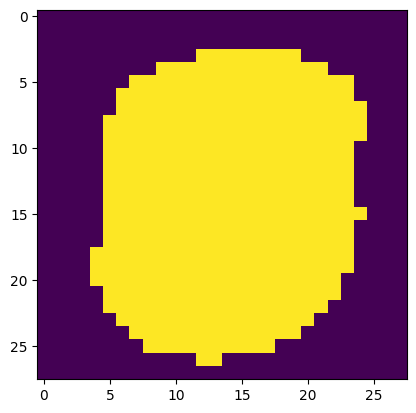

In [123]:
th = 0.1
selected_features = np.where(fl_weigths > th, True, False)
plt.imshow(selected_features.reshape(28,28))

In [124]:
train_x_ravel[:,selected_features].shape

(60000, 402)

In [125]:
for c in classifiers:
    classifiers[c].fit(train_x_cp[:,selected_features],train_y)
    pred = classifiers[c].predict(test_x_cp[:,selected_features])

    cm = confusion_matrix(test_y,pred)
    bal = balanced_accuracy_score(test_y, pred)
    acc = accuracy_score(test_y, pred)

    print('*****',c,'*******')
    print('CM ',c,'Original:',cm)
    print('BalAcc ',c,' Original:',bal)
    print('Acc ',c,'Original:',acc)
    print('************')


***** DecisionTreeClassifier() *******
CM  DecisionTreeClassifier() Original: [[ 901    2   21    9    9   14   15    3    3    3]
 [   0 1075   10    6    7    3    9    3   19    3]
 [  15   14  882   37   12    6    9   27   28    2]
 [  12   12   33  820    8   46    3   17   39   20]
 [   3    7   10    9  848    9   16   13   14   53]
 [  15    7    7   59    8  705   35   12   24   20]
 [  16    7   18    8   11   20  860    2   13    3]
 [   1   12   31   17    6    4    2  920   13   22]
 [  17    9   34   44   27   37   14   15  750   27]
 [  11    5    9   24   51   24    5   19   22  839]]
BalAcc  DecisionTreeClassifier()  Original: 0.8581141272477464
Acc  DecisionTreeClassifier() Original: 0.86
************
***** RandomForestClassifier() *******
CM  RandomForestClassifier() Original: [[ 972    0    0    0    0    2    2    1    2    1]
 [   0 1118    3    3    0    2    4    1    4    0]
 [   5    0  995    8    2    0    4    8    9    1]
 [   0    0   12  964    0    9  